In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("./lichess-sampled.parquet")
df.head()

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12
1,Classical,https://lichess.org/iclkx584,Voltvolf,Marzinkus,White,1824.0,1811.0,11.0,-11.0,C02,360+6,Normal,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd...,NaN,NaN,<NA>,2012-12-31 23:10:00
2,Classical,https://lichess.org/ufcqmfxx,6WX,adamsrj,White,1463.0,1504.0,62.0,-12.0,C44,1560+30,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. N...,NaN,NaN,<NA>,2012-12-31 23:16:04
3,Classical,https://lichess.org/qwuudn2s,sebastian44,jtkjtkful,Black,1347.0,1519.0,-6.0,23.0,B01,300+5,Time forfeit,1. e4 d5 2. e5 d4 3. Nf3 Nc6 4. c3 d3 5. Na3 f...,NaN,NaN,<NA>,2012-12-31 23:24:11
4,Classical,https://lichess.org/c9qfp8es,peter2,Killi,Black,1519.0,1572.0,-9.0,9.0,C28,480+0,Normal,1. e4 Nc6 2. Nc3 e5 3. Bc4 Nf6 4. d3 h6 5. f3 ...,NaN,NaN,<NA>,2013-01-01 00:51:20


In [19]:
df["Titled"] = ~df[['WhiteTitle', 'BlackTitle']].isnull().all(axis=1)
df.head(3)

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date,Titled
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12,False
1,Classical,https://lichess.org/iclkx584,Voltvolf,Marzinkus,White,1824.0,1811.0,11.0,-11.0,C02,360+6,Normal,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd...,NaN,NaN,<NA>,2012-12-31 23:10:00,False
2,Classical,https://lichess.org/ufcqmfxx,6WX,adamsrj,White,1463.0,1504.0,62.0,-12.0,C44,1560+30,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. N...,NaN,NaN,<NA>,2012-12-31 23:16:04,False


In [36]:
titled_v_non_titled = df[df[['WhiteTitle', 'BlackTitle']].isnull().any(axis=1)]

# How the game ends when at least one person has a title
More likely to draw, or "Unknown" (which is an abandonded game)

In [35]:
pd.crosstab(df.Result, df.Titled, normalize="columns")

Titled,False,True
Result,,
Black,0.458122,0.441625
Draw,0.043552,0.087122
Unknown,0.000301,0.001467
White,0.498026,0.469786


<AxesSubplot:xlabel='Result'>

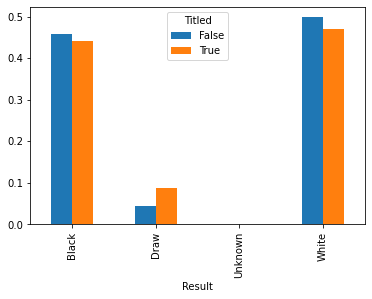

In [34]:
pd.crosstab(df.Result, df.Titled, normalize="columns").plot.bar()

In [58]:
df[(df.Titled == True) & (df.Result == "Unknown")].Termination.value_counts()

Abandoned           10
Normal               0
Rules infraction     0
Time forfeit         0
Unterminated         0
Name: Termination, dtype: int64

## Why the game ends up being terminated
(more likely to abandon, but also more likely to finish "normally" as opposed to forfeiting by time)

In [68]:
pd.crosstab(df.Termination, df.Titled, normalize='columns').round(6)

Titled,False,True
Termination,,
Abandoned,0.003112,0.007334
Normal,0.858448,0.917424
Rules infraction,0.000314,0.001027
Time forfeit,0.138125,0.074215
Unterminated,0.000000,0.000000


<AxesSubplot:xlabel='Termination'>

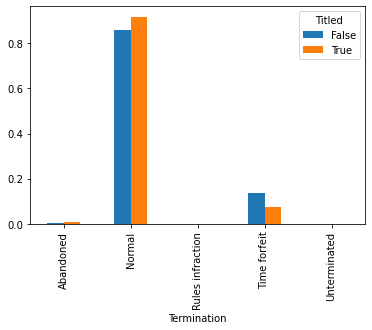

In [59]:
pd.crosstab(df.Termination, df.Titled, normalize="columns").plot.bar()

# Comparing White Titled openings vs the whole community's openings

<AxesSubplot:>

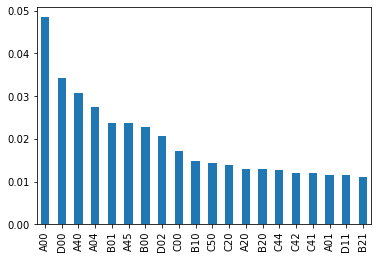

In [76]:
df[~df["WhiteTitle"].isnull()].ECO.value_counts(normalize=True).head(20).plot.bar()

<AxesSubplot:>

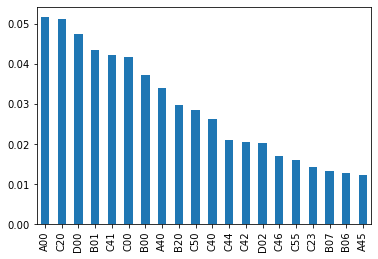

In [77]:
df.ECO.value_counts(normalize=True).head(20).plot.bar()

# Early Resignation (how many moves, against whom, what openings more likely to cause it?)

In [79]:
df.Termination.value_counts()

Normal              3680063
Time forfeit         591623
Abandoned             13369
Rules infraction       1352
Unterminated              2
Name: Termination, dtype: int64